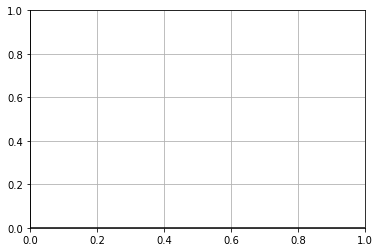

In [5]:
import sympy as smp
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

1.39

In [6]:
t = smp.symbols('t', real=True)
x = t
y = t ** 2
dist = smp.sqrt((x - 2)**2 + (y - 0.5)**2)
tsols = smp.solve(smp.diff(dist, t), t)[0]
x.subs([(t, tsols)]), y.subs([(t, tsols)])

(1.00000000000000, 1.00000000000000)

1.40

In [ ]:
t = smp.symbols('t', real=True)
x = 2 * smp.cos(t)
y = smp.sin(t)
dist = smp.sqrt((x - 0.75)**2 + (y - 0)**2)
tsols = smp.solve(smp.diff(dist, t), t)[0]
x.subs([(t, tsols)]), y.subs([(t, tsols)])

(1.00000000000000, -0.866025403784439)

11.2 1 + til 14

In [ ]:
x, y, t = smp.symbols('x y t', real=True)
def tangentleq(xt, yt, tval):
    dy = smp.diff(yt)
    dx = smp.diff(xt)
    tan = (y - yt - (x - xt) * dy/dx).subs([(t, tval)]).simplify()
    d2ydx2 = (smp.diff(dy/dx)/dx).subs([(t, tval)]).simplify()
    return tan, d2ydx2

In [ ]:
probs = [(2 * smp.cos(t), 2 * smp.sin(t), smp.pi / 4),
         (smp.sin(2 * smp.pi * t), smp.cos(2 * smp.pi * t), - 1 / 6),
         (4 * smp.sin(t), 2 * smp.cos(t), smp.pi / 4),
         (1 / (1 + t), t / (t - 1), 2)
         ]

In [ ]:
for p in probs:
    print(tangentleq(*p))

(x + y - 2*sqrt(2), -sqrt(2))
(-x/tan(0.166666666666667*pi) + y - 1/sin(0.166666666666667*pi), -1/cos(0.333333333333333*pi)**3)
(x/2 + y - 2*sqrt(2), -sqrt(2)/4)
(-9*x + y + 1, 108)


11.2 15 + til 6

In [ ]:
f, g = smp.symbols('f g', cls=smp.Function)
x = f(t)
y = g(t)
def p2(xe, ye, tval):
    xt = smp.solve(xe, x)[0]
    yt = smp.solve(ye, y)[0]
    return (smp.diff(yt) / smp.diff(xt)).subs([(t, tval)])

In [ ]:
probs = [(x**3 + 2*t**2 - 9, 2*y**3 - 3*t**2 - 4, 2),
         (x + 2 * smp.sqrt(x) ** 3 - t**2 - t, y*smp.sqrt(t + 1) + 2*t*smp.sqrt(y) - 4 , 0)
]

p2(*probs[1])

In [ ]:
smp.diff(x + 2 * smp.sqrt(x) ** 3 - t**2 - t, t)
smp.diff(y*smp.sqrt(t + 1) + 2*t*smp.sqrt(y) - 4, t)

t*Derivative(g(t), t)/sqrt(g(t)) + sqrt(t + 1)*Derivative(g(t), t) + 2*sqrt(g(t)) + g(t)/(2*sqrt(t + 1))

In [ ]:
smp.solve(t + 2 * t **1.5, t)

[0.0]

11.2. 21 - 24

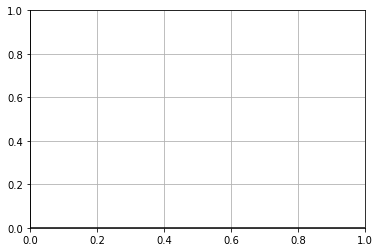

In [16]:
def graph(x, y, l, h):
    tval = np.linspace(l, h, 100)
    xl = smp.lambdify([t], x)
    yl = smp.lambdify([t], y)
    plt.grid(True, which='both')
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.plot(xl(tval), yl(tval))


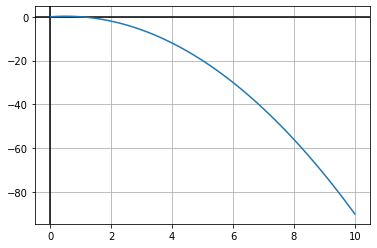

In [17]:
graph(t, t - t**2, 0, 10)

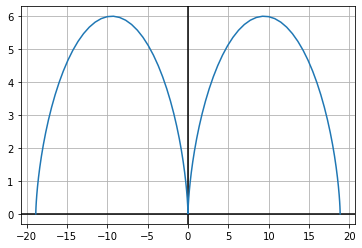

In [20]:
graph(3 * (t - smp.sin(t)), 3 * (1 - smp.cos(t)), -2 * np.pi, 2 * np.pi)

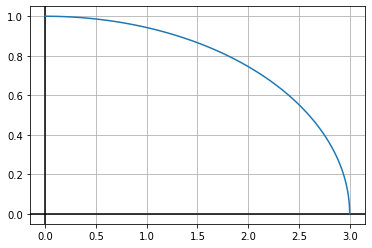

In [24]:
graph(3 * smp.cos(t), smp.sin(t), 0, 0.5 * np.pi)